In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("/content/corona_data.csv")

In [4]:
data.head()

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,0
1,75,102,1,0,0,1
2,25,98,0,0,0,1
3,34,97,0,0,0,0
4,4,96,0,1,0,1


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7104.0,50.533080,28.969553,1.0,26.0,51.0,76.0,100.0
Fever,7104.0,102.004786,3.774807,96.0,99.0,102.0,105.0,108.0
BodyPains,7104.0,0.496903,0.500026,0.0,0.0,0.0,1.0,1.0
RunnyNose,7104.0,0.505208,0.500008,0.0,0.0,1.0,1.0,1.0
Difficulty_in_Breath,7104.0,0.494792,0.500008,0.0,0.0,0.0,1.0,1.0
infection_Probability,7104.0,0.493525,0.499993,0.0,0.0,0.0,1.0,1.0


In [6]:
data.isnull().any()

Age                      False
Fever                    False
BodyPains                False
RunnyNose                False
Difficulty_in_Breath     False
infection_Probability    False
dtype: bool

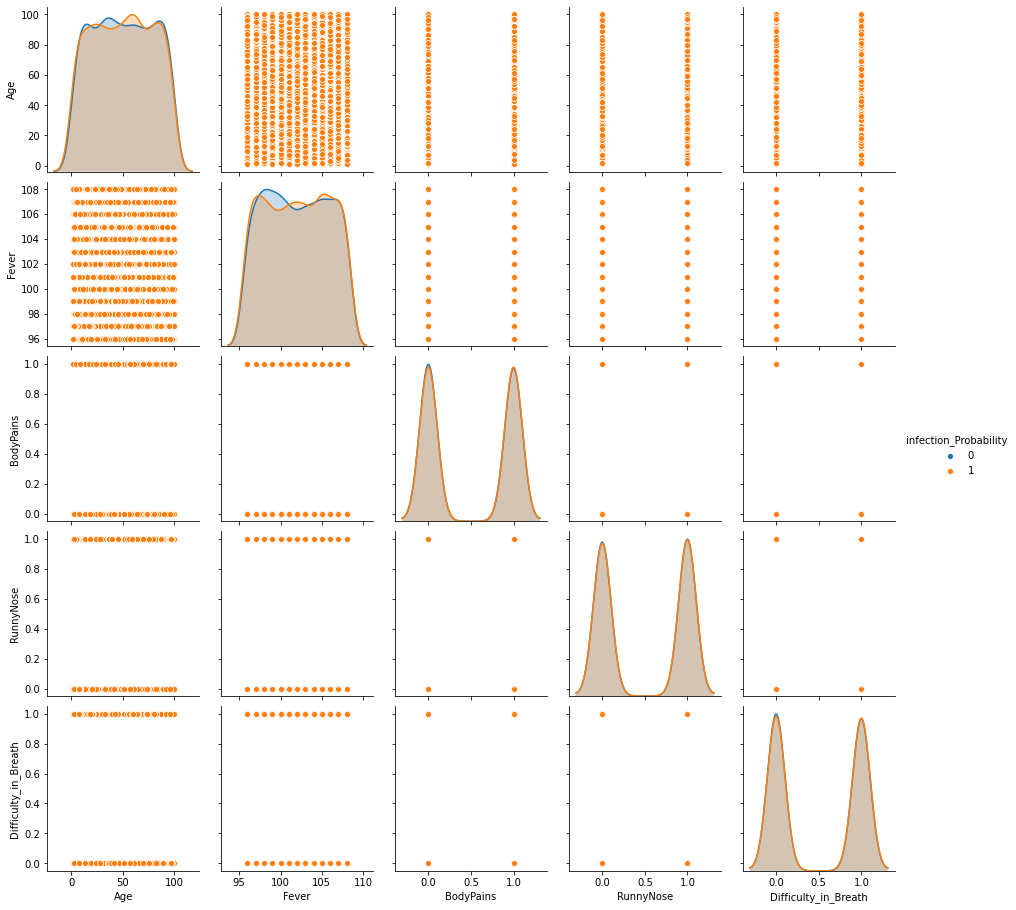

In [7]:
sns.pairplot(data, hue="infection_Probability")

In [10]:
x=data[['Age','Fever','BodyPains','RunnyNose','Difficulty_in_Breath']]

In [11]:
y=data['infection_Probability']

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
filename = 'covid_predictor.pkl'
pickle.dump(classifier, open(filename, 'wb'))